In [1]:
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add
)

# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# How to check if Keras is using GPU?

from keras import backend as K

train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Using TensorFlow backend.


In [2]:
X_train = (train[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
y_train = to_categorical(train['digit'].values)

In [3]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          1

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [6]:
epochs = 200
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.25)

history = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    #callbacks=[annealer], 
    #verbose=0
)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 48 steps, validate on 512 samples
Epoch 1/200
48/48 [==============================] - 4s 82ms/step - loss: 2.3072 - accuracy: 0.1003 - val_loss: 2.3002 - val_accuracy: 0.1172
Epoch 2/200
48/48 [==============================] - 0s 9ms/step - loss: 2.2814 - accuracy: 0.1406 - val_loss: 2.1311 - val_accuracy: 0.2500
Epoch 3/200
48/48 [==============================] - 0s 8ms/step - loss: 2.1428 - accuracy: 0.2233 - val_loss: 1.7377 - val_accuracy: 0.3789
Epoch 4/200
48/48 [==============================] - 0s 8ms/step - loss: 2.0088 - accuracy: 0.2917 - val_loss: 1.5841 - val_accuracy: 0.4629
Epoch 5/200
48/48 [==============================] - 0s 8ms/step - loss: 1.8304 - accuracy: 0.3581 - val_loss: 1.3917 - val_accuracy: 0.5781
Epoch 6/200
48/48 [==============================] - 0s 8ms/step - loss: 1.7601 - accuracy: 0.3737 - val_loss: 1.3118 - val_accuracy: 0.5664
Epoch 7/

48/48 [==============================] - 0s 8ms/step - loss: 0.5901 - accuracy: 0.7930 - val_loss: 0.6364 - val_accuracy: 0.8184
Epoch 57/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5877 - accuracy: 0.8177 - val_loss: 0.5616 - val_accuracy: 0.8281
Epoch 58/200
48/48 [==============================] - 0s 9ms/step - loss: 0.5524 - accuracy: 0.8184 - val_loss: 0.5381 - val_accuracy: 0.8301
Epoch 59/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5629 - accuracy: 0.8086 - val_loss: 0.6414 - val_accuracy: 0.7930
Epoch 60/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5189 - accuracy: 0.8294 - val_loss: 0.4794 - val_accuracy: 0.8574
Epoch 61/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5660 - accuracy: 0.8053 - val_loss: 0.5780 - val_accuracy: 0.8496
Epoch 62/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5503 - accuracy: 0.8151 - val_loss: 0.7167 - val_accuracy: 0.7676
Epoch 63/200
48/48 

Epoch 114/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3653 - accuracy: 0.8880 - val_loss: 0.5722 - val_accuracy: 0.8672
Epoch 115/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3991 - accuracy: 0.8685 - val_loss: 0.5334 - val_accuracy: 0.8477
Epoch 116/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4285 - accuracy: 0.8646 - val_loss: 0.5642 - val_accuracy: 0.8477
Epoch 117/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3679 - accuracy: 0.8900 - val_loss: 0.4968 - val_accuracy: 0.8574
Epoch 118/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3648 - accuracy: 0.8854 - val_loss: 0.7401 - val_accuracy: 0.8145
Epoch 119/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.8822 - val_loss: 0.6030 - val_accuracy: 0.8457
Epoch 120/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3812 - accuracy: 0.8639 - val_loss: 0.5890 - val_accuracy: 0.8516

48/48 [==============================] - 0s 9ms/step - loss: 0.3983 - accuracy: 0.8737 - val_loss: 0.7436 - val_accuracy: 0.8301
Epoch 172/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3777 - accuracy: 0.8796 - val_loss: 0.5621 - val_accuracy: 0.8379
Epoch 173/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4552 - accuracy: 0.8613 - val_loss: 0.4733 - val_accuracy: 0.8672
Epoch 174/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4442 - accuracy: 0.8763 - val_loss: 0.4808 - val_accuracy: 0.8652
Epoch 175/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8809 - val_loss: 0.5340 - val_accuracy: 0.8516
Epoch 176/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4343 - accuracy: 0.8685 - val_loss: 0.7584 - val_accuracy: 0.8574
Epoch 177/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3243 - accuracy: 0.8971 - val_loss: 0.8306 - val_accuracy: 0.8027
Epoch 178/200

In [7]:
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

CNN: Epochs=200, Train accuracy=0.90169, Validation accuracy=0.87500


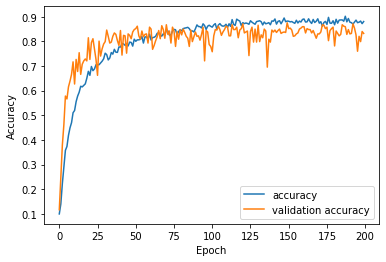

In [8]:
plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()